# 18.065 Matrix Methods in Data Analysis, Signal Processing, and Machine Learning

#### Gilbert Strang

[Course](https://ocw.mit.edu/courses/18-065-matrix-methods-in-data-analysis-signal-processing-and-machine-learning-spring-2018/video_galleries/video-lectures/)


In [ ]:
import numpy as np
import pandas as pd
from sympy import Matrix, symbols, eye, zeros, simplify, factor, MatrixSymbol
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la

from linalgutil import decompose_matrix

## Lecture 1: The Column Space of A Contains All Vectors Ax

First lecture kicks off with refresh of fundamental concepts of linear algebra. Professor Strang introduces the column view on matrices. Every column of a matrix can be viewed as a vector in a vector space. The column space of a matrix A is the span of its columns, which means it contains all possible linear combinations of those columns.

There is a notion of independence among the columns. If the columns are linearly independent, they span a space of dimension equal to the number of columns. If they are dependent, some columns can be expressed as linear combinations of others.

Below is a simple code snippet that illustrates the concept of column space in Python using NumPy:

If square matrix A is invertible, then the column space of A is the entire space R^n. If A is not square or not full rank, the column space is a proper subspace of R^n.

In [ ]:
A = np.array([
    [3, 4],
    [6, 8]
])

col_space, rmatrix, null_space = decompose_matrix(A)


display(Matrix(col_space))
display(Matrix(rmatrix))

In [ ]:
A = np.array([[1],[2]])
B = np.array([3,4])

A*B

In [ ]:
A

In [ ]:
np.vstack(
    [
        *[np.matrix([[1,2],[0,1]]),np.matrix([[3,0],[0,0]])]
        ])

In [ ]:
# Check rank (should be 2, since one column is dependent)
rank = np.linalg.matrix_rank(A)
print("Matrix A:")
display(Matrix(A))
print("Rank of A:", rank)

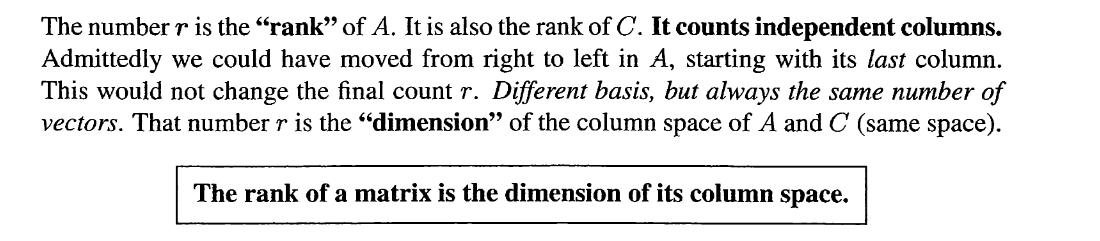

In [ ]:
A = np.matrix(
    [
        [1,3,8],
        [1,2,6],
        [0,1,2]
    ]
)

In [ ]:
# np.vstack([eye(2), eye(2)])
np.stack([np.eye(2), np.eye(2), np.eye(2)], axis=-1)[0,1,:]

1. Give an example where a combination of three nonzero vectors in R4 is the zero
vector. Then write your example in the form Ax = 0. What are the shapes of A and
x and 0 ?

In [ ]:
# write a linear combination of 4 non zero vectors in R4
v1 = np.array([1, 2, 3, 4])
v2 = np.array([-2, -3, -4, -5])
v3 = np.array([1, 1, 1, 1])
A = np.array([v1, v2, v3]).T
# write a linear combination of the vectors in A
c = np.array([1, 1, 1])
Ax = A @ c
# print the result
print("Ax = ", Ax)
# what is the shape of A and x
print("Shape of A:", A.shape)
print("Shape of c:", c.shape)

Suppose A is the 3 by 3 matrix ones(3, 3) of all ones. Find two independent vectors x and y that solve Ax = 0 and Ay = 0. Write that first equation Ax = 0 (with numbers) as a combination of the columns of A. Why don’t I ask for a third independent vector with Az = 0 ?

In [ ]:
# generate 3x3 matrix with 1s
A = np.ones((3, 3))

In [ ]:
x = np.array([7, -7, 0])
y = np.array([-1, 0, 1])   
Ax = A @ c
Ay = A @ y

print(Ax, Ay)


A nullspace of a matrix A is the set of all vectors x such that Ax = 0. The nullspace is a subspace of Rn, where n is the number of columns of A. The nullspace contains the zero vector and is closed under addition and scalar multiplication.

In [ ]:
A = Matrix([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

nullspace = A.nullspace()
for vec in nullspace:
    print(vec)

In [ ]:
A = Matrix([
    [1,3],
    [5,7]
])
A.columnspace()

## Lecture 2: Matrix-Matrix Multiplication AB

#### Insight from Column times Row
Why is the outer product approach essential in data science ? The short answer is : We are
looking for the important part of a matrix A. We don't usually want the biggest number
in A (though that could be important). What we want more is the largest piece of A. And
those pieces are rank one matrices u v T. A dominant theme in applied linear algebra is :
Factor A into CR and look at the pieces ckr~ of A= CR.